In [1]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
input_files = ["fridges.jsonline", "headphones.jsonline", "keyboards.jsonline",
               "laptop_bags.jsonline", "laptops.jsonline", "mice.jsonline", "phones.jsonline",
               "tvs.jsonline", "usb_sticks.jsonline"]

In [3]:
dfs = []
for input_file in input_files:
    frame = pd.read_json(input_file, lines=True)
    frame.name = input_file.split(".")[0]
    dfs.append(frame)
dfs[0]

author date_published  \
0                             \n–ê—Ä—Ç—ë–º     2017-10-14   
1                        \nLollij KLM      2018-1-09   
2                  \n–ú–∞–∫—Å–∏–º –ü–∏–ª–∏–ø–µ–Ω–∫–æ      2018-3-28   
3                    \n–û–ª–µ–≥ –ú–∞–ª–∏—Ü—å–∫–∏–π      2018-3-17   
4                           \n–õ—é–¥–º–∏–ª–∞      2018-3-12   
5                             \n–ò–≥–æ—Ä—å      2018-3-12   
6                             \nLeona      2018-3-12   
7                   \n–û–ª–µ–Ω–∞ –í–∞—Å–∏–ª—ñ–≤–Ω–∞      2018-3-15   
8                      \n–û—Ä–µ–ª –ï–≤–≥–µ–Ω–∏–π      2018-2-24   
9                             \n–Ü—Ä–∏–Ω–∞      2018-2-11   
10                           \n–¥–∞–Ω–∏–∏–ª      2018-1-21   
11                          \n–ù–∞—Ç–∞–ª—å—è      2013-4-24   
12                          \n–ù–∞—Ç–∞–ª—å—è      2013-8-26   
13                         \n–ò—Å–∫–∞—Ç–µ–ª—å      2017-4-04   
14                \n–í—ã—Ö–æ–≤–∞–Ω–µ—Ü –ù–∞–¥–µ–∂–¥–∞      2018-4-03   
15                            \n–ï–ª–µ–Ω–∞      2018-3-27   
16                       \nivan dimov      2018-2-14   
17                        \n–ê–ª–µ–∫—Å–∞–Ω–¥—Ä     2017-11-26   
18                          \n–î–º–∏—Ç—Ä–∏–π      2017-8-31   
19           \n–ú–∞—Ä–≥–∞—Ä–∏—Ç–∞ –ö—Ä–∏–≤–æ–≤—è–∑–µ–Ω–∫–æ      2018-3-26   
20                            \n–ò–≥–æ—Ä—å      2018-3-26   
21                           \n–ú–∏—Ö–∞–∏–ª      2018-3-22   
22                            \n–ò–≥–æ—Ä—å      2018-3-17   
23                   \n–î–µ–Ω–∏—Å –ú–æ–ª—á–∞–Ω–æ–≤      2018-1-22   
24                            \n–ò–≥–æ—Ä—å      2018-1-12   
25                 \n–í–∞–ª–µ—Ä–∏–π –®–µ–≤—á–µ–Ω–∫–æ      2018-1-03   
26                     \n–î–µ–Ω–∏—Å –¢–µ—Ç–µ—Ä—è     2016-11-28   
27                   \n–ê–Ω–¥—Ä–µ–π –ì–æ—Ä–¥–µ–µ–≤     2017-10-06   
28                             \n–û–ª–µ–≥      2018-1-25   
29                          \n–û–ª–µ–∫—Å—ñ–π      2017-7-27   
..                                ...            ...   
608                        \n–°–≤–µ—Ç–ª–∞–Ω–∞      2018-4-03   
609                 \nVolodymyr Kozak      2018-4-03   
610                           \n–¢–∏–º—É—Ä      2018-4-03   
611                 \n–ê–Ω–¥—Ä–µ–π –ö—Ä–∏–≤–µ–Ω–∫–æ      2018-3-29   
612                           \nArtem      2018-3-10   
613                  \n–ü–∞–≤–µ–ª –§–∏–ª–∏–ø–ø–æ–≤      2018-3-03   
614                       \n–ê–ª–µ–∫—Å–∞–Ω–¥—Ä      2018-2-20   
615                  \n–†–∞–∏—Å–∞ –¥–∞–Ω–∏–ª–∏–Ω–∞      2018-3-27   
616                 \n–õ–∏–Ω–µ—Ü –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     2017-10-22   
617                  \n–¢–∞—Ç—å—è–Ω–∞ –§–æ–∫–∏–Ω–∞      2018-3-27   
618                       \n–ö–æ—Å—Ç—è–Ω—Ç–∏–Ω      2018-4-01   
619                \n–ú–∏—Ö–∞–∏–ª –°–æ—á–∏–Ω—Å–∫–∏–π      2018-3-30   
620                 \n–í–∞–ª–µ—Ä–∏–π –ú–æ–Ω–æ–º–∞—Ö      2018-3-21   
621                   \n–ú–∞—Ä–∏–Ω–∞ –ö–æ—Å—Ç—é–∫      2018-2-16   
622                   \n–û–ª–µ–≥ –ö–æ–∂—É—à–Ω—ã–π     2017-11-02   
623                   \n–°–∞—à–∞ –®–µ–≤—á–µ–Ω–∫–æ      2017-8-17   
624                    \n–õ—è—à–µ–Ω–∫–æ –ê–Ω–Ω–∞     2017-10-06   
625                \n–°—É–ø–µ–Ω–∫–æ –í–ª–∞–¥–∏–º–∏—Ä     2017-12-05   
626                           \n–ü–∞–≤–µ–ª     2016-12-13   
627                           \n–ê—Ä—Å–µ–Ω      2015-7-15   
628                \nElena Berezovska      2018-4-02   
629  \n–í–æ–ª–æ–¥—å–∫–æ –í'—è—á–µ—Å–ª–∞–≤ –ú–∏–∫–æ–ª–∞–π–æ–≤–∏—á      2017-8-25   
630                          \n–ú–∏—Ö–∞–∏–ª      2018-2-04   
631                 \n–ê–ª—ë–Ω–∞ –ì–µ—Ä–∞—â–µ–Ω–∫–æ      2017-8-18   
632                  \n–í–∏—Ç–∞–ª–∏–π –†—è–±—Ü–æ–≤     2016-12-22   
633                          \n–£–ª—å—è–Ω–∞      2016-5-21   
634                      \nmikhailena      2017-2-09   
635                           \n–í–∞–¥–∏–º     2016-12-13   
636                            \n–ñ–µ–Ω—è     2017-11-26   
637                   \nAlex Voloshin      2017-4-24   

                                       

In [4]:
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "N/A"
for df in dfs:
    df['lang'] = df['review_markup'].apply(detect_lang)

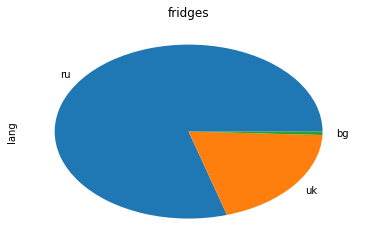

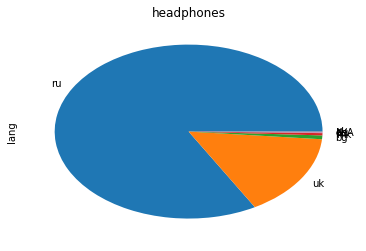

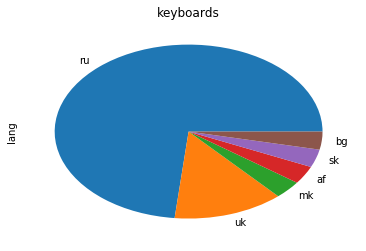

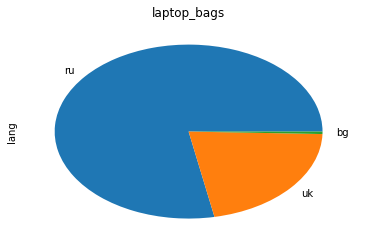

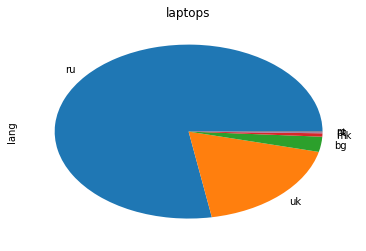

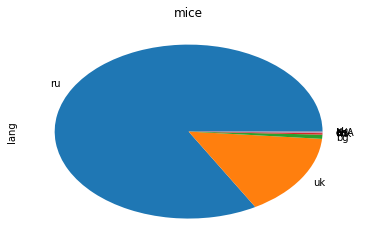

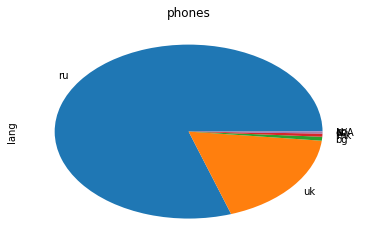

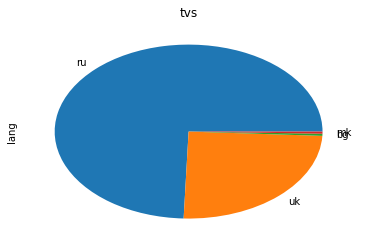

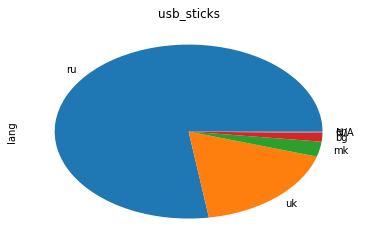

In [65]:
for df in dfs:
    df['lang'].value_counts().plot(kind='pie', title = df.name)
    plt.show()

In [5]:
df_all = pd.concat(dfs)

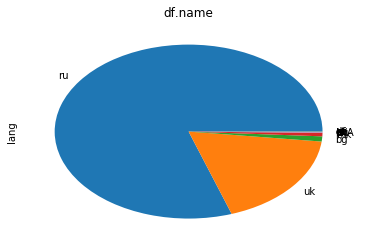

In [67]:
df_all['lang'].value_counts().plot(kind='pie', title = "df.name")

–í –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Ñ—Ä–µ–π–º–∞—Ö –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Å–µ–π –Ω–µ —Ä—É/—É–∞ —è–∑—ã–∫–æ–≤. –ú–Ω–æ–≥–æ –≤ % —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∏–º–µ–Ω–Ω–æ —ç—Ç–∏ –≤—ã–±–æ—Ä–∫–∏ –Ω–µ–±–æ–ª—å—à–∏–µ.

In [69]:
df_all['lang'].value_counts()

ru     5967
uk     1336
bg       71
mk       46
N/A       6
en        3
sk        3
de        2
et        1
af        1
so        1
pt        1
ro        1
Name: lang, dtype: int64

–ì–∏–ø–æ—Ç–µ–∑–∞: –ø—Ä–æ–±–ª–µ–º–∞ –≤ —Å–ª–æ–≤–µ "–ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏/–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞". –°—Ç–∞–Ω–µ—Ç –ª–∏ –ª—É—á—à–µ, –µ—Å–ª–∏ –∏—Ö –∑–∞–º–µ–Ω–∏—Ç—å?

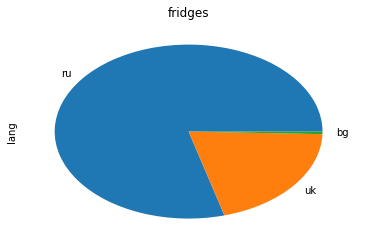

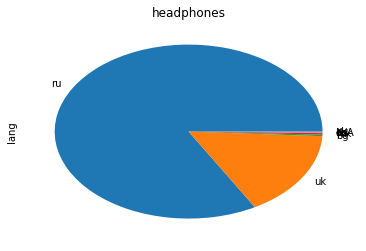

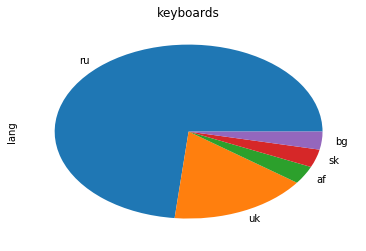

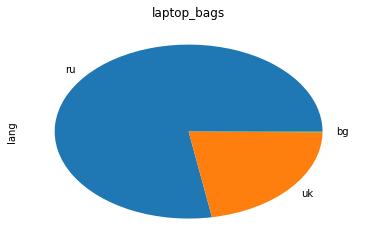

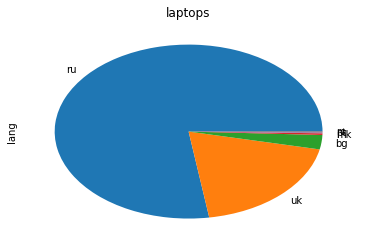

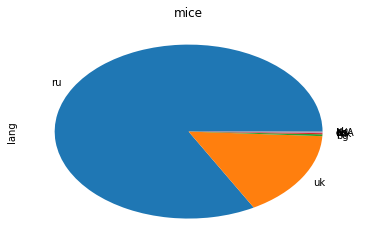

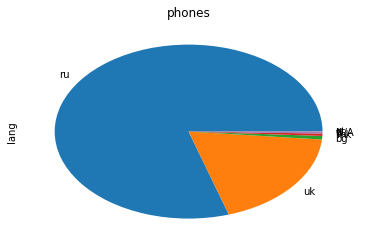

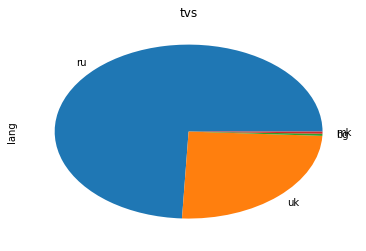

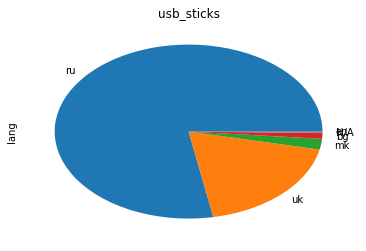

In [70]:
for df in dfs:
    df['review_markup'] = df['review_markup'].apply(lambda str: re.sub("\n–ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏", "\n–ù–µ–¥–æ–ª—ñ–∫–∏", re.sub("\n–î–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞:", "\n–ü–µ—Ä–µ–≤–∞–≥–∏:", str)))
    df['lang'] = df['review_markup'].apply(detect_lang)
    df['lang'].value_counts().plot(kind='pie', title = df.name)
    plt.show()

In [71]:
df_all_ukrainified = pd.concat(dfs)

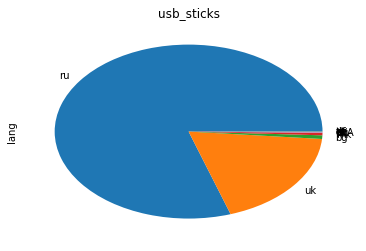

In [72]:
df_all_ukrainified['lang'].value_counts().plot(kind='pie', title = df.name)

In [73]:
df_all_ukrainified['lang'].value_counts()

ru     5957
uk     1381
bg       50
mk       32
N/A       6
en        3
sk        3
de        2
et        1
af        1
tl        1
pt        1
ro        1
Name: lang, dtype: int64

In [74]:
df_all_ukrainified[(df_all_ukrainified['lang'] != df_all['lang']) & (df_all_ukrainified['lang'] == 'uk')]

author date_published  \
47                        \n–Ñ–≥–æ—Ä      2018-3-28   
183                 \n–Ü–≤–∞–Ω –°–µ–Ω–∏–∫      2018-1-30   
282                    \n–í–∏—Ç–∞–ª–∏–π      2018-3-14   
50                      \n–°–µ—Ä–≥–µ–π      2018-3-28   
57               \nIrylj Grafira      2018-3-28   
552             \n—ñ–≤–∞–Ω –∑–∞–≤–æ–¥–µ–Ω–∫–æ      2018-1-30   
751              \n–í–∏—Ç–∞–ª–∏–π –î–∏–¥—ã–∫     2016-11-25   
968             \n–ú–æ—Ä–æ–∑ –í–ª–∞–¥–∏–º–∏—Ä      2018-3-22   
1132              \nr.bondar2013     2017-12-20   
1164                    \n–¢–µ—Ç—è–Ω–∞      2018-1-16   
1366            \n–Ø—Ä–æ—Å–ª–∞–≤ –î–µ–º'—è–Ω     2016-12-03   
1367                      \n–í–æ–≤–∞     2017-12-25   
28                       \n—Ä–æ–º–∞–Ω     2017-11-10   
165                      \n–ì–æ—Å—Ç—å      2018-2-22   
505            \n–ë–æ–≥–¥–∞–Ω –ë–∞–±—ñ—î–Ω–∫–æ      2018-1-16   
506              \n–í–∞–¥–∏–º –û–≤—á–∞—Ä—É–∫     2017-12-04   
556   \n–°–ª–∞–≤—É—Ç–∞ –ê–ª–µ–∫—Å–µ–π –ü–µ—Ç—Ä–æ–≤–∏—á      2017-4-12   
75             \n–ê—Ä—Ç—ë–º –ë–µ–ª—è–Ω—Å–∫–∏–π     2017-11-20   
115            \nTheBlack Shadow      2018-2-10   
130                 \nDray Out's      2018-3-31   
244               \n–†–æ–º–∞ –†–æ–º–∞–Ω–æ–≤      2017-9-13   
332             \n–ù–∏–∫–æ–ª–∞–π –í–æ–ª–∫–æ–≤      2018-3-28   
54                      \n–°–µ—Ä–≥–µ–π      2018-3-28   
263                     \n–¢–µ—Ç—è–Ω–∞      2018-1-16   
344                     \n–°–µ—Ä–≥–µ–π      2018-2-23   
360                      \n–∏—Ä–∏–Ω–∞      2018-3-28   
479             \n—ñ–≤–∞–Ω –∑–∞–≤–æ–¥–µ–Ω–∫–æ      2018-1-30   
637             \n–í–∞—Å–∏–ª–∏–π –®–∏–ø–∏–ª–æ      2018-1-01   
680            \n–ï–≤–≥–µ–Ω–∏–π –û–ª–µ–π–Ω–∏–∫     2016-12-08   
926             \n–ú–æ—Ä–æ–∑ –í–ª–∞–¥–∏–º–∏—Ä      2018-3-22   
1370            \n–Ø—Ä–æ—Å–ª–∞–≤ –î–µ–º'—è–Ω     2016-12-03   
1371                      \n–í–æ–≤–∞     2017-12-25   
420                    \n–î–º–∏—Ç—Ä–∏–π      2018-3-26   
456                     \n–ê–Ω–¥—Ä–µ–π      2018-4-01   
712                       \n–Ü–≤–∞–Ω     2017-11-03   
940                     \nz.dima     2017-12-07   
953               \n–ò–ª—å—è –ß–µ–±–∞–Ω–æ–≤      2018-1-31   
1106                  \n–≤–∞–ª–µ–Ω—Ç–∏–Ω     2016-10-11   
1322              \n–æ–ª–µ–≥ –≤–æ–ª—ã–Ω–µ—Ü      2018-4-03   
89          \n–ò–≥–æ—Ä—å –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á      2018-3-05   
273                     \nvshola     2017-12-23   
301                    \n–ù–∞—Ç–∞–ª—å—è     2017-12-12   
354               \nAttila Mihok      2013-5-02   
532            \n–ò–ª—å—è –ó–∏–Ω–≥–æ—Ä–µ–Ω–∫–æ      2017-8-20   
553          \n–û–∫—Å–∞–Ω–∞ –•–∞—Ä–∏–ø–æ–Ω—á—É–∫      2018-3-05   
731              \n–õ—é–¥–º–∏–ª–∞ –ë–æ–π–∫–æ      2018-2-14   

                                           product_name  rating_max  \
47          –î–≤—É—Ö–∫–∞–º–µ—Ä–Ω—ã–π —Ö–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫ ELENBERG MRF-221-O           5   
183      –û–¥–Ω–æ–∫–∞–º–µ—Ä–Ω—ã–π —Ö–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫ ELECTROLUX ERF4113AOW           5   
282                  –•–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫ SAMSUNG RB30J3000WW/UA           5   
50    –ú—ã—à—å A4Tech Bloody AL90 USB Black (4711421917964)           5   
57    –ú—ã—à—å A4Tech G3-200N Wireless Black (4711421902...           5   
552            –ú—ã—à—å Fantech W556 Wireless Black (W556b)           5   
751                  –ú—ã—à—å Real-El RM-302 Wireless Black           5   
968    –ú—ã—à—å Genius DX-150X USB Black/Blue (31010231102)           5   
1132       –ú—ã—à—å A4Tech N-360-1 USB Grey (4711421865180)           5   
1164              –ú—ã—à—å HP X1200 USB Black/Red (H6F01AA)           5   
1366       –ú—ã—à—å Aula Tantibus USB Black (6948391211688)           5   
1367       –ú—ã—à—å Aula Tantibus USB Black (6948391211688)           5   
28    –ö–ª–∞–≤–∏–∞—Ç—É—Ä–∞ –¥–ª—è –Ω–æ—É—Ç–±—É–∫–∞ PowerPlant HP 250: G2,...           5   
165   –°—É–º–∫–∞ –¥–ª—è –Ω–æ—É—Ç–±—É–∫–∞ Modecom Torino 15.6" Black ...           5   
505     –°—É–º–∫–∞ –¥–ª—è –Ω–æ—É—Ç–±—É–∫–∞ Por

—á–∏—Å—Ç–æ –≤–∏–∑—É–∞–ª—å–Ω–æ, —á–∞—Å—Ç—å –∏–∑ —ç—Ç–∏—Ö –æ—Ç–∑—ã–≤–æ–≤ - –Ω–∞ —Ä—É—Å—Å–∫–æ–º. –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –ø—Ä–æ–≤–µ—Ä–∫—É –Ω–µ –ø—Ä–æ—à–ª–∞, –≤–æ–∑–≤—Ä–∞—â–∞–µ–º—Å—è –∫ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–º—É –≤–∞—Ä–∏–∞–Ω—Ç—É, –Ω–æ –¥–µ–ª–∞–µ–º –∑–∞–º–µ–Ω—É –ø–µ—Ä–µ–¥ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º. –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ, –≥–¥–µ –¥–µ—Ç–µ–∫—Ç–æ—Ä –æ–ø–µ—Ä–µ–¥–µ–ª–∏–ª "uk"

In [6]:
df_all.describe()

rating_max  rating_min  rating_value
count      7439.0      7439.0   7439.000000
mean          5.0         1.0      4.511897
std           0.0         0.0      1.033110
min           5.0         1.0      1.000000
25%           5.0         1.0      5.000000
50%           5.0         1.0      5.000000
75%           5.0         1.0      5.000000
max           5.0         1.0      5.000000

–í–∏–¥–∏–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–π –æ—Ç–∑—ã–≤ –ø–æ –≤—Å–µ–π –≤—ã–±–æ–∫–µ ‚Äì 4.5 —Å –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ–º 1.033, —á—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —É –Ω–∞—Å –±—É–¥—É—Ç —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã, –µ—Å–ª–∏ –º—ã –ø–æ—Å—Ç–∞–≤–∏–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ 1/2 - –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–π, 3 - –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–π –∏ 4/5 - –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–π –æ—Ç–∑—ã–≤. –¢–∞–∫–∂–µ –Ω—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —ç—Ç–æ –Ω–∞ –Ω–∞—à–µ–π –ø–æ–¥–≤—ã–±–æ—Ä–∫–µ.

In [8]:
df_all['rating_value'].value_counts()

5    5619
4     917
1     321
3     316
2     266
Name: rating_value, dtype: int64

In [9]:
to_save = df_all[df_all['lang'] == "uk"].copy()

In [21]:
to_save['review_markup'] = to_save['review_markup'].apply(lambda str: re.sub("\n–ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏", "\n–ù–µ–¥–æ–ª—ñ–∫–∏", re.sub("\n–î–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞:", "\n–ü–µ—Ä–µ–≤–∞–≥–∏:", str)))

In [95]:
to_save['rating_value'].value_counts()

5    974
4    190
3     58
2     58
1     58
Name: rating_value, dtype: int64

In [22]:
to_save['rating_value'].describe()

count    1338.000000
mean        4.467862
std         1.056772
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating_value, dtype: float64

–í –ø–æ–¥–≤—ã–±–æ—Ä–∫–µ —Å—Ä–µ–¥–Ω–µ–µ –∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –Ω–µ–º–Ω–æ–≥–∏–º –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –æ–±—â–µ–π –≤—ã–±–æ—Ä–∫–∏.

–ï—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞–ª–∏—á–∏—è –º—É—Å–æ—Ä–Ω—ã—Ö —Å–æ–æ–±—â–µ–Ω–∏–π (—Ö–æ—Ç—è —á–∞—Å—Ç—å —É–∂–µ –æ—Ç—Å–µ—è–ª–∞—Å—å –Ω–∞ —ç—Ç–∞–ø–µ –¥–µ—Ç–µ–∫—Ü–∏–∏ —è–∑—ã–∫–æ–≤ –∏ –ø–æ–ø–∞–ª–∞ –≤ "N/A"/–¥—Ä—É–≥–∏–µ —è–∑—ã–∫–∏), –Ω–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω–Ω –∫–æ–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ (–∏ –æ—Ü–µ–Ω–æ–∫)

In [23]:
to_save['review_markup'].str.len().describe()

count    1338.000000
mean      367.227205
std       485.708351
min         6.000000
25%       116.000000
50%       224.500000
75%       419.000000
max      4665.000000
Name: review_markup, dtype: float64

–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–Ω–∞ 6, —á—Ç–æ –Ω–∞—Å—Ç—Ä–æ–∞–∂–∏–≤–∞–µ—Ç —Å —É—á–µ—Ç–æ–º —Ç–æ–≥–æ, —á—Ç–æ –≤ —Ä–∞–∑–º–µ—Ç–∫–µ –¥–æ–ª–∂–Ω—ã –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–æ–≤–∞—Ç—å —Å–ª–æ–≤–∞ "–ü–µ—Ä–µ–≤–∞–≥–∏:" –∏ "–ù–µ–¥–æ–ª—ñ–∫–∏"

In [38]:
to_save[to_save['review_markup'].str.len() < 17]

author date_published  \
95                   \n–æ–ª–µ–≥      2018-4-01   
231   \n–ê–Ω–¥—Ä–µ–π –ú–∏—Ö–∞–π–ª–æ–≤—Å–∫–∏–π      2018-2-01   
432                \n–ê–Ω–¥—Ä–µ–π      2018-3-16   
1133                \n–†–æ–º–∞–Ω     2017-12-12   
104         \n–ü–∞–Ω—å–∫—ñ–≤ –ú–∞—Ä—ñ—è     2017-11-13   
239       \n–°–≤—è—Ç–Ω–µ–Ω–∫–æ –¢–∞—Ä–∞—Å      2018-4-02   
127          \ngypalo_roman     2017-10-20   
216                 \n–ì–æ—Å—Ç—å     2017-11-26   
407      \n–ö–æ–ª–æ—Å–æ–≤–∏—á –ú–∞—Ä–∏–Ω–∞      2017-2-22   
917                \n–ê–Ω–¥—Ä–µ–π      2018-3-16   
1099                \n–†–æ–º–∞–Ω     2017-12-12   
387           \nBoris Senik     2017-12-13   
1100   \n–û–ª–µ–∫—Å–∞–Ω–¥—Ä –°—Ç–µ–ø–µ–Ω–∫–æ      2018-4-02   
609        \n–û–∫—Å–∞–Ω–∞ –ü–æ–ø–∞–¥—é–∫      2018-1-14   

                                           product_name  rating_max  \
95                         –•–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫ LIEBHERR CU 3311           5   
231             –î–≤—É—Ö–∫–∞–º–µ—Ä–Ω—ã–π —Ö–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫ BEKO DSA 28020           5   
432   –ú—ã—à—å Logitech MX Ergo Bluetooth Graphite (910-...           5   
1133            –ú—ã—à—å Genius Cam USB Black (31010169101)           5   
104   –°—É–º–∫–∞ –¥–ª—è –Ω–æ—É—Ç–±—É–∫–∞ Crown Classic 15.6" Black (...           5   
239   –°—É–º–∫–∞ –¥–ª—è –Ω–æ—É—Ç–±—É–∫–∞ X-Digital Wilson 116 16'' B...           5   
127   –ù–æ—É—Ç–±—É–∫ –ù–æ—É—Ç–±—É–∫ Asus ZenBook 3 UX390UA (UX390U...           5   
216   –ù–æ—É—Ç–±—É–∫ –ù–æ—É—Ç–±—É–∫ Apple MacBook A1534 12" Space ...           5   
407                –ú—ã—à—å Crown CMXG-606 USB Black/ Brown           5   
917   –ú—ã—à—å Logitech MX Ergo Bluetooth Graphite (910-...           5   
1099            –ú—ã—à—å Genius Cam USB Black (31010169101)           5   
387                                   ZTE Blade L5 Grey           5   
1100                        Prestigio Wize C1 Duo Black           5   
609      Transcend JetFlash 300 16GB Black (TS16GJF300)           5   

      rating_min  rating_value     review_markup  \
95             1             4      –¶—ñ–Ω–∞ —è–∫—ñ—Å—Ç—å.   
231            1             5           –ü—Ä–∞—Ü—é—î!   
432            1             5    —É–¥–æ–±–Ω–æ —á–∏—Å—Ç–∏—Ç—å   
1133           1             3  –°–∫—Ä–æ–ª –Ω–µ –ø—Ä–∞—Ü—é—î.   
104            1             5     –°–æ–ª—ñ–¥–Ω–∞ —Å—É–º–∫–∞   
239            1             5       —Ü—ñ–Ω–∞-—è–∫—ñ—Å—Ç—å   
127            1             5         Gta5 –ø—ñ–¥–µ   
216            1             5      –¶–µ 2016 —Ä—ñ–∫?   
407            1             5          –¥–æ–≤–æ–ª—å–Ω–∞   
917            1             5    —É–¥–æ–±–Ω–æ —á–∏—Å—Ç–∏—Ç—å   
1099           1             3  –°–∫—Ä–æ–ª –Ω–µ –ø—Ä–∞—Ü—é—î.   
387            1             5  –º–µ–Ω—ñ –ø–æ–¥–æ–±–∞—î—Ç—å—Å—è   
1100           1             1            –ù—ñ—è–∫–∏–π   
609            1             5  –ø—Ä–∞—Ü—é—î –Ω–æ—Ä–º–∞–ª—å–Ω–æ   

                                        vote_extra_info vote_negative  \
95                                                                      
231                                                                     
432                                                                     
1133                                                                1   
104                                                                     
239                                                                     
127                                                                 1   
216   \n50% –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å—á–∏—Ç–∞—é—Ç —ç—Ç–æ—Ç –æ—Ç–∑—ã–≤ –ø–æ–ª–µ–∑–Ω—ã–º\n             1   
407                                                                     
917                                                                     
1099                                                                1   
387                                                                 1   
1100                                                                    
609                                            

–µ—Å–ª–∏ –∑–∞–π–¥–µ–º –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∏–∑ —ç—Ç–∏—Ö –æ—Ç–∑—ã–≤–æ–≤, –æ–∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –∏–º –≤—Å–µ–º –∏–º–µ—Ç—å —Å–µ–∫—Ü–∏–∏ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞/–Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ + –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∏–∑ –ø–æ–¥–æ–±–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ —É–¥–∞–ª—è—é—Ç.

In [70]:
pd.concat([to_save, to_save['review_markup'].str.len().rename('length')], axis=1).sort_values(by='length', ascending=False)[0:50]['rating_value'].value_counts()

5    49
4     1
Name: rating_value, dtype: int64

–ò–∑ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π:
    - —Ç–æ–ø 3 –¥–ª–∏–Ω–Ω—ã—Ö –æ—Ç–∑—ã–≤–∞ - —É —Ö–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫–æ–≤
    - –∏–Ω–æ–≥–¥–∞ –ø–æ–ø–∞–¥–∞—é—Ç—Å—è –¥—É–±–ª–∏–∫–∞—Ç—ã —Å–æ–æ–±—â–µ–Ω–∏–π, –Ω–µ –∑–Ω–∞—é, –ø—Ä–æ–±–ª–µ–º–∞ –ª–∏ –º–µ—Ö–∞–Ω–∏–∑–º–∞ –ø–æ–ª—É—á–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ –æ–Ω–∏ –ø–æ–≤—Ç–æ—Ä–Ω–æ –ø–æ—Å—Ç–∏–ª–∏—Å—å –Ω–∞ —Å–∞–º–æ–π —Ä–æ–∑–µ—Ç–∫–µ
    - —Ç–æ–ø-50 —Å–æ–æ–±—â–µ–Ω–∏–π –ø–æ –¥–ª–∏–Ω–Ω–µ (–∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º 47–≥–æ) —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 5, –ø–æ—ç—Ç–æ–º—É —Å –Ω–∏–º–∏ –º–æ–≥–ª–æ –±—ã —Å—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ—Å—Ç–æ–µ –ø—Ä–∞–≤–∏–ª–æ "–¥–ª–∏–Ω–Ω–∞ > 1412 => 5", —É —Ç–æ–ø-100 - 90 —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 5

In [76]:
rating_vs_len = pd.concat([(to_save['rating_value'].rename('rating')), (to_save['review_markup'].str.len().rename('length'))], axis=1)
rating_vs_len.head(3)

rating  length
3       3     163
6       5    1745
7       5     274

In [88]:
rating_vs_len.groupby('rating').describe()

length                                                             
        count        mean         std   min     25%    50%     75%     max
rating                                                                    
1        58.0  223.379310  156.697365   6.0  117.00  171.5  312.75   669.0
2        58.0  304.241379  211.902685  49.0  143.25  241.0  426.00   908.0
3        58.0  325.724138  251.128456  16.0  164.00  263.0  396.00  1133.0
4       190.0  264.542105  259.195756  12.0  112.00  175.0  337.25  1474.0
5       974.0  402.046201  546.359999   7.0  114.00  235.5  450.75  4665.0

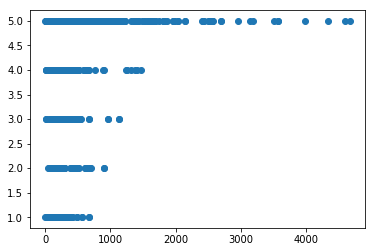

In [85]:
plt.scatter(rating_vs_len['length'], rating_vs_len['rating'])

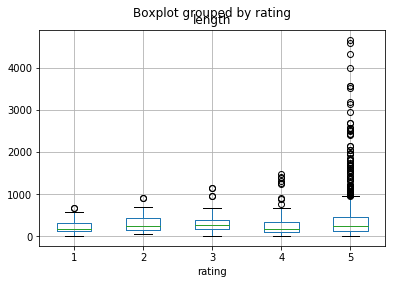

In [87]:
rating_vs_len.boxplot(column='length',by='rating')

–≤–∏–¥–Ω–æ, —á—Ç–æ –µ—Å—Ç—å –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è —É —Ä–µ–π–Ω–¥–∂–µ–π, –∏–∑ –∑–∞–±–∞–≤–Ω–æ–≥–æ, —á–µ–º –≤—ã—à–µ —Ä–µ–π—Ç–∏–Ω–≥ ‚Äì —Ç–µ–º –≤—ã—à–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏–π –≤ –Ω–µ–º –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Ä–µ–π—Ç–∏–Ω–≥–∞–º–∏ –Ω–∏–∂–µ. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏–º–µ–µ—Ç —É—Å–ª–æ–≤–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω—É—é —Ñ–æ—Ä–º—É

In [113]:
# resetting everything just in case
to_save = df_all[df_all['lang'] == "uk"].copy()
to_save['review_markup'] = to_save['review_markup'].apply(lambda str: re.sub("\n–ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏", "\n–ù–µ–¥–æ–ª—ñ–∫–∏", re.sub("\n–î–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞:", "\n–ü–µ—Ä–µ–≤–∞–≥–∏:", str)))

In [114]:
mapping = {
    1: 'negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'positive'
}
to_save['class'] = to_save['rating_value'].apply(lambda rating: mapping[rating])
to_save = to_save[['class', 'review_markup']]

In [115]:
to_save['class'].value_counts()

positive    1164
negative     116
neutral       58
Name: class, dtype: int64

–í–∏–¥–∏–º –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤.

In [116]:
to_save.to_json('cleaned_data.json', orient="records")

In [3]:
!gzip cleaned_data.json

–û–¥–∏–Ω –∏–∑ –æ—Ç–∫—Ä—ã—Ç—ã—Ö –≤–æ–ø—Ä–æ—Å–æ–≤: —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ—Å–ª–µ "–Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏" / "–ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞" —á–∏—Ç–µ—Ä—Å—Ç–≤–æ–º –∏–ª–∏ –Ω–µ—Ç ü§î–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –Ω–µ—Ç, –∏–Ω–∞—á–µ –∏–ª–∏ –≤—ã–∫–∏–¥—ã–≤–∞–µ–º –±–æ–ª—å—à–æ–µ % –∫–æ–Ω—Ç–µ–Ω—Ç–∞, –∏–ª–∏, –µ—Å–ª–∏ —É–±–∏—Ä–∞—Ç—å –ª–∏—à—å —ç—Ç–∏ 2 —Å–ª–æ–≤–∞, —Ç–æ –ø–æ—Ç–µ—Ä—è–µ—Ç—Å—è –ª–æ–≥–∏—á–µ—Å–∫–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–≥–æ –ø—Ä–∏–¥–µ—Ä–∂–∏–≤–∞—é—Ç—Å—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏
–í—Ç–æ—Ä–æ–π: –∫–∞–∫ –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–π/–Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–π/–Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–π —Å —É—á–µ—Ç–æ–º –æ–±—ä–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤—ã—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ –∏ —Ñ–∞–∫—Ç–∞, —á—Ç–æ —ç—Ç–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–∞–∑–º–µ—Ä –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤. –ò –µ—Å–ª–∏ 1/2/5 - –¥–æ–≤–æ–ª—å–Ω–æ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω—ã, —Ç–æ –æ—Ü–µ–Ω–∫–∞ 3 - –ø–æ—á—Ç–∏ –≤—Å–µ–≥–¥–∞ —Å–∏—Ç—É–∞—Ü–∏—è "–∏–º–µ–µ—Ç –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏, –Ω–æ –æ–Ω–∏ —á–µ–º-—Ç–æ –∫–æ–º–ø–µ–Ω—Å–∏—Ä—É—é—Ç—Å—è", 4 - "–≤—Ä–æ–¥–µ —Ö–æ—Ä–æ—à–æ, –Ω–æ —á—Ç–æ-—Ç–æ —Å —Ç–æ–≤–∞—Ä–æ–º –Ω–µ —Ç–∞–∫".

–í–æ–∑–º–æ–∂–Ω–æ, –∏ –¥—Ä—É–≥–∞—è –∞–Ω–∞–ª–∏—Ç–∏–∫–∞ –±—ã–ª–∞ –±—ã –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞
- —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —è–∑—ã–∫–æ–≤ –ø–æ –∏–∑–±—Ä–∞–Ω–Ω—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
- —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–π –∑–∞/–ø—Ä–æ—Ç–∏–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —è–∑—ã–∫–æ–≤ (–∏ –Ω–∞–ª–∏—á–∏—è –≥—Ä–∞–º–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –æ—à–∏–±–æ–∫ :))
- —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–π —Å —É—á–µ—Ç–æ–º —Ü–µ–Ω—ã / –∫–∞—Ç–µ–≥–æ—Ä–∏–∏

–ù–æ –ø–µ—Ä–µ–π–¥–µ–º –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –∫ –∑–∞–¥–∞—á–µ